## Observations and Insights 

1.) From the line plot, the tumor volume of mice treated with Capomulin decreased significantly over time.

2.) From the correlation equation, we can determine that there is a strong, positive correlation (0.84) between the average weight of the mouse and size of tumor volume. The heavier the mouse, the average size of the tumor increases.

3.) Of the four encouraging drugs, Ceftamin has the largest IQR, meaning the largest range of temperatures fall within the first and third quartiles. 

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
study_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [113]:
# Check the number of mice.
study_data_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [114]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_df["Mouse ID"].value_counts()

g989    13
l471    10
g570    10
z795    10
p438    10
        ..
x226     1
f932     1
h428     1
x336     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [115]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data_dup = study_data_df[study_data_df.duplicated(["Mouse ID", "Timepoint"])]
# mouse_dup = study_data_dup.loc ["g989", :]
study_data_dup.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_data_df = study_data_df.loc[study_data_df['Mouse ID'] != 'g989']
clean_study_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [117]:
# Check the number of mice in the clean DataFrame.
clean_study_data_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [118]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_response_mean = clean_study_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_response_median = clean_study_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_response_variance = clean_study_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_response_std = clean_study_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_response_sem = clean_study_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# # This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_response_df = pd.DataFrame({
                                "Mean": tumor_response_mean,
                               "Median": tumor_response_median,
                               "Variance": tumor_response_variance,
                              "Standard Deviation": tumor_response_std,
                              "SEM": tumor_response_sem
                            })

tumor_response_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [119]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

## Bar and Pie Charts

<function matplotlib.pyplot.show(*args, **kw)>

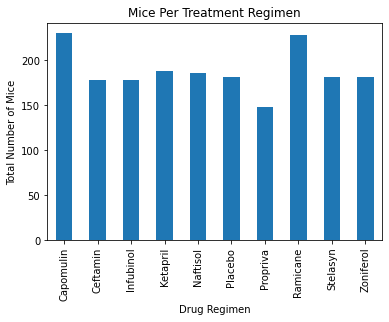

In [120]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
tumor_response_count = clean_study_data_df.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
tumor_response_count

tumor_response_count.plot (kind="bar")
plt.title("Mice Per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.show


## Note: this plot will be identical to the one that uses Pyplot

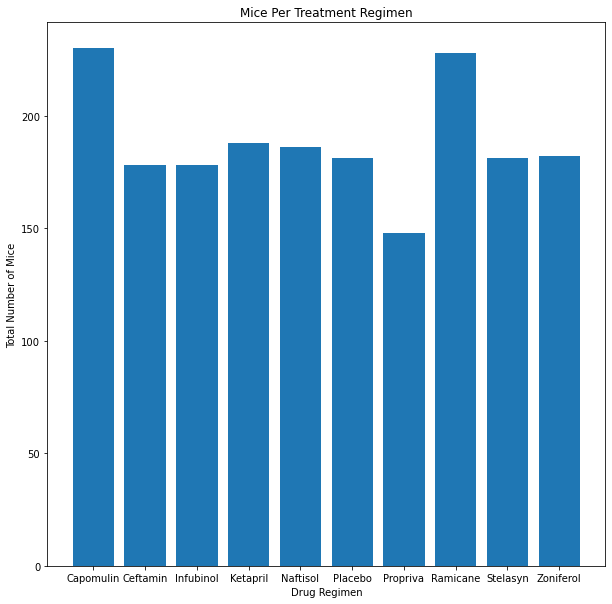

In [121]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

plt.figure(figsize=(10,10))
plt.bar(tumor_response_count.index, tumor_response_count)
plt.title("Mice Per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.show()

##  Note: this plot will be identical to the one that uses Pandas

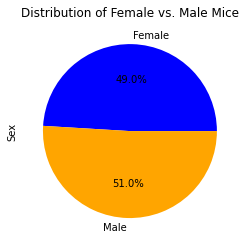

In [122]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

gender_group = clean_study_data_df.groupby('Sex')

gender_group_count = pd.DataFrame(gender_group['Sex'].count())

gender_group_count.plot(kind='pie', y='Sex', title = 'Distribution of Female vs. Male Mice', autopct="%1.1f%%", colors = ["blue", "orange"], legend=False)

plt.show()

In [134]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

# # The colors of each section of the pie chart
colors = ["blue", "orange"]

# Get Labels for our pie chart from the index values of the groupby dataframe
genders = [list(gender_group_count.index.values)]

# The values of each section of the pie chart
gender_counts = gender_group_count["Sex"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

plt.pie(gender_counts, labels=genders, colors=colors, autopct="%1.1f%%")

plt.title("Distribution of Female vs. Male Mice")

plt.ylabel("Sex")

plt.axis("equal")

plt.show()


#  Note: this plot will be identical to the one that uses Pandas

## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse
timepoint_mouse = clean_study_data_df.groupby("Mouse ID").max()["Timepoint"]
timepoint_mouse_df = pd.DataFrame({"Timepoint": timepoint_mouse}).reset_index()
timepoint_mouse_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_mouse_df = pd.merge(timepoint_mouse_df, clean_study_data_df, on=["Mouse ID", "Timepoint"])
timepoint_mouse_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [125]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)

drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = []

for drug in drug_regimen:
    regimen = timepoint_mouse_df.loc[timepoint_mouse_df ["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumor_volume.append(regimen)
    
    
    quartiles = regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"\n**************{drug}************\n")
    
    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    


**************Capomulin************

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

**************Ramicane************

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

**************Infubinol************

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Value

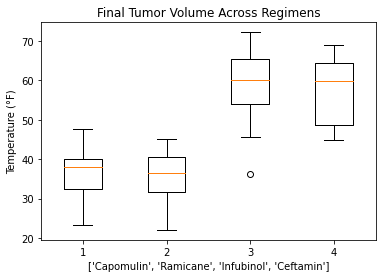

In [126]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume Across Regimens")
ax1.set_xlabel(drug_regimen)
ax1.set_ylabel("Temperature (°F)")
ax1.boxplot(tumor_volume)
plt.show()

## Line and Scatter Plots

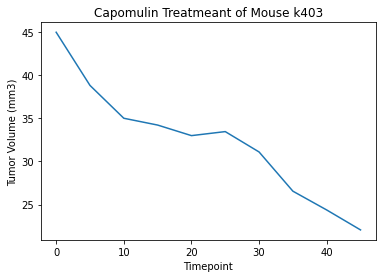

In [127]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
capomulin_data_df = clean_study_data_df.loc[clean_study_data_df["Mouse ID"] == "k403"]
capomulin_data_df.head()

timepoint_axis = capomulin_data_df["Timepoint"]
tumorsize_axis = capomulin_data_df["Tumor Volume (mm3)"]

plt.title("Capomulin Treatmeant of Mouse k403")
plt.plot(timepoint_axis, tumorsize_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

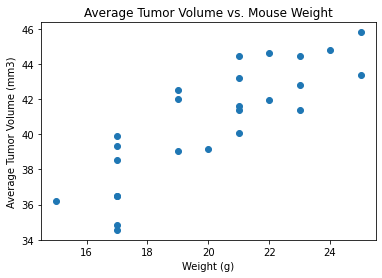

In [128]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
capomulin_average_df = clean_study_data_df.loc[clean_study_data_df["Drug Regimen"] == "Capomulin"]

capomulin_mean = capomulin_average_df.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Tumor Volume vs. Mouse Weight")

plt.show()


## Correlation and Regression

In [129]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen.

correlation = st.pearsonr(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


/opt/anaconda3/envs/NewPythonData/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/opt/anaconda3/envs/NewPythonData/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


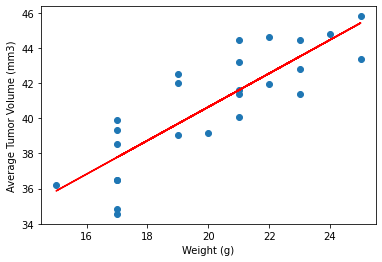

In [130]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen.

regression_model=st.linregress(capomulin_data_df["Weight (g)"],capomulin_data_df["Tumor Volume (mm3)"])
regression_model


x_values = capomulin_mean["Weight (g)"]
y_values = capomulin_mean["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()